Perfect — you’re dealing with an ESRI GRID (ArcInfo GRID) elevation dataset.
This format is a raster format commonly used for digital elevation models (DEMs).

In [1]:
import geopandas as gpd
import pandas as pd
import rasterio
from rasterio.mask import mask
import matplotlib.pyplot as plt

EPSG:4326


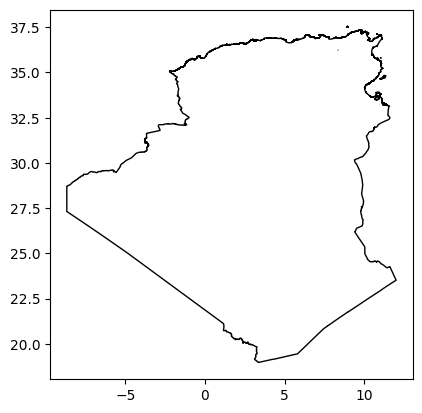

In [2]:
# Path to your merged geopackage
folder_path = "../../ExtractedDatasets/GeoBoundaries/AOI_DZA_TUN"
countries = gpd.read_file(f"{folder_path}/aoi_dza_tun.gpkg")

print(countries.crs)
countries.plot(edgecolor="black", facecolor="none")

# save the image to images folder
image_folder = "../../Rapport_TP/images/dz_tn_mergedcountry_map.jpg"
plt.savefig(image_folder)


In [3]:
raster_path = "../../Datasets/ElevationDataset/be15_grd/be15_grd"  # folder containing .adf files
src = rasterio.open(raster_path)
print("Raster CRS:", src.crs)



Raster CRS: EPSG:4326


In [4]:
countries = countries.to_crs(src.crs)


In [ ]:
geoms = countries.geometry.values  # geometries for both countries

out_image, out_transform = mask(src, geoms, crop=True)
out_meta = src.meta.copy()

out_meta.update({
    "driver": "GTiff",  # specify the format to explicitly change the driver when saving to something writable — usually "GTiff" (GeoTIFF format) because aig is read only
    "height": out_image.shape[1],
    "width": out_image.shape[2],
    "transform": out_transform
})


# Save the clipped raster
with rasterio.open("../../ExtractedDatasets/ElevationDataset/elevation_dz_tn.tif", "w", **out_meta) as dest:
    dest.write(out_image)



DriverCapabilityError: Writer does not exist for driver: AIG

In [ ]:
plt.imshow(out_image[0], cmap="terrain")
plt.title("Elevation - Algeria & Tunisia")
plt.colorbar(label="Elevation (m)")
plt.show()

